# Polynomial Regression

## Importing the libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [5]:
dataset = pd.read_csv('julyWeatherReport.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Training the Linear Regression model on the whole dataset

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

## Visualising the Linear Regression results

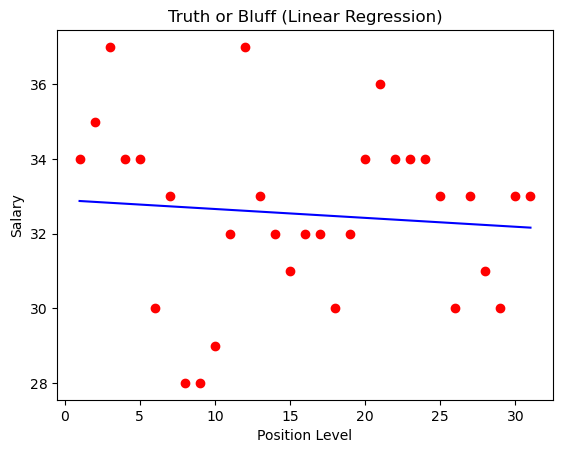

In [10]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results

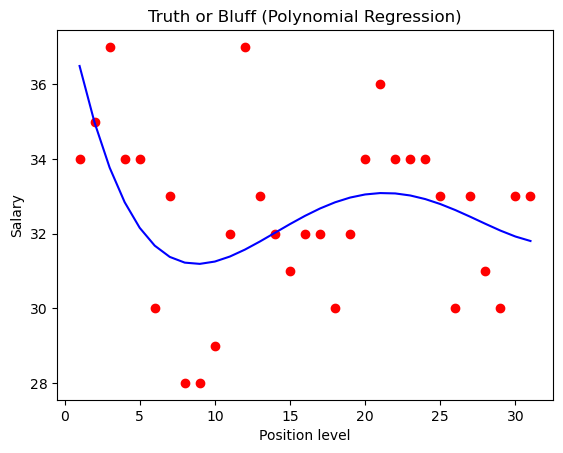

In [11]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

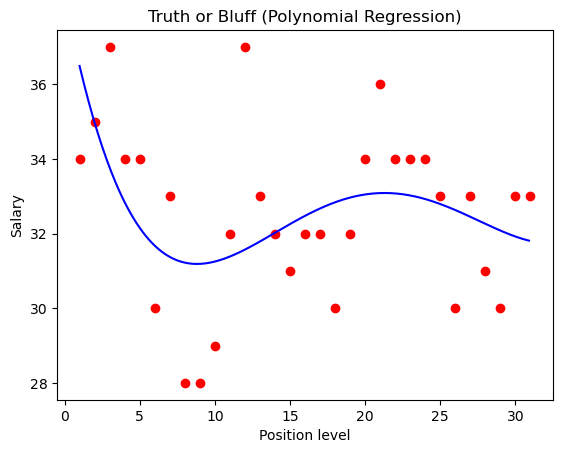

In [12]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [ ]:
lin_reg.predict([[6.5]])

array([32.7421371])

## Predicting a new result with Polynomial Regression

In [ ]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([31.5059998])

## Feature Scaling

In [ ]:
y = y.reshape(len(y),1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [ ]:
print(X)

[[-1.67705098]
 [-1.56524758]
 [-1.45344419]
 [-1.34164079]
 [-1.22983739]
 [-1.11803399]
 [-1.00623059]
 [-0.89442719]
 [-0.78262379]
 [-0.67082039]
 [-0.55901699]
 [-0.4472136 ]
 [-0.3354102 ]
 [-0.2236068 ]
 [-0.1118034 ]
 [ 0.        ]
 [ 0.1118034 ]
 [ 0.2236068 ]
 [ 0.3354102 ]
 [ 0.4472136 ]
 [ 0.55901699]
 [ 0.67082039]
 [ 0.78262379]
 [ 0.89442719]
 [ 1.00623059]
 [ 1.11803399]
 [ 1.22983739]
 [ 1.34164079]
 [ 1.45344419]
 [ 1.56524758]
 [ 1.67705098]]


In [ ]:
print(y)

[[ 0.65368349]
 [ 1.09420931]
 [ 1.97526097]
 [ 0.65368349]
 [ 0.65368349]
 [-1.10841982]
 [ 0.21315766]
 [-1.98947148]
 [-1.98947148]
 [-1.54894565]
 [-0.22736817]
 [ 1.97526097]
 [ 0.21315766]
 [-0.22736817]
 [-0.667894  ]
 [-0.22736817]
 [-0.22736817]
 [-1.10841982]
 [-0.22736817]
 [ 0.65368349]
 [ 1.53473514]
 [ 0.65368349]
 [ 0.65368349]
 [ 0.65368349]
 [ 0.21315766]
 [-1.10841982]
 [ 0.21315766]
 [-0.667894  ]
 [-1.10841982]
 [ 0.21315766]
 [ 0.21315766]]


## Training the SVR model on the whole dataset

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [ ]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[32.94616612]])

## Visualising the SVR results

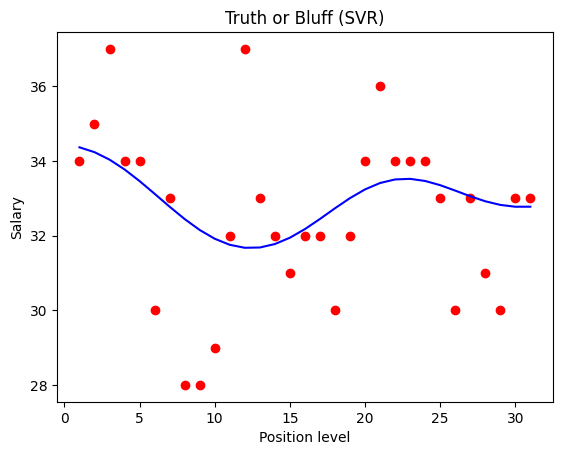

In [ ]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

C:\Users\harsh\AppData\Local\Temp\ipykernel_8380\1412826726.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)


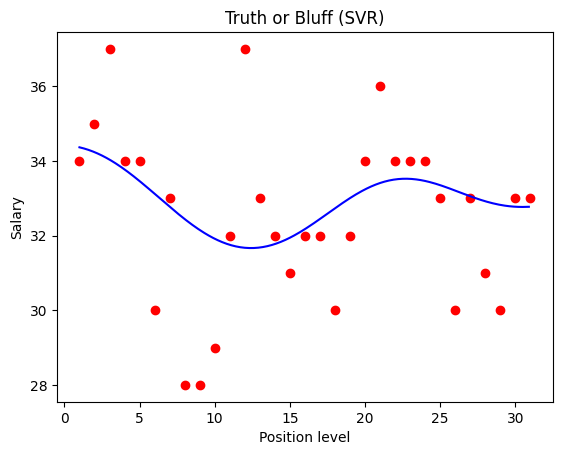

In [ ]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()